<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


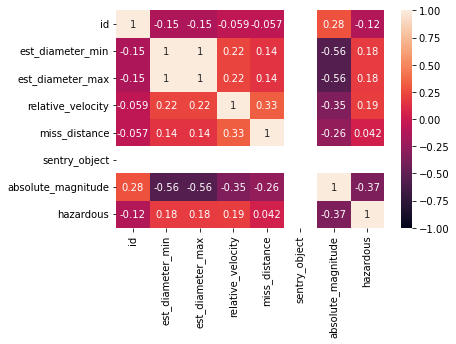

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib as plt


aster = pd.read_csv('/Users/davidpitoun/All_Ironhack/TeamProjects/project7-models_asteroids/neo.csv')

aster.info()
aster['orbiting_body'].unique()

#it is all the same orbiting object
aster = aster.drop(columns=['orbiting_body'], axis=1)

corr = aster.corr()
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)


In [2]:
aster = aster.drop(columns=['sentry_object'], axis=1)
aster = aster.drop(columns=['est_diameter_min'], axis=1)


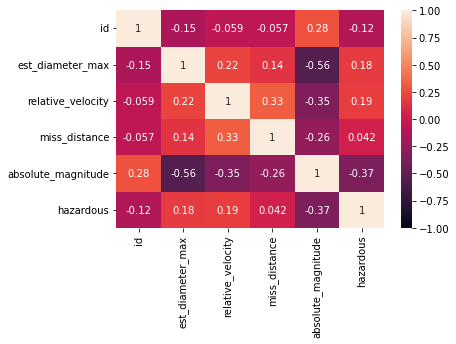

In [4]:
corr1 = aster.corr()
heatmap = sns.heatmap(corr1, vmin=-1, vmax=1, annot=True)

In [ ]:
sns.boxplot(aster[''])

In [8]:
aster.columns

Index(['id', 'name', 'est_diameter_max', 'relative_velocity', 'miss_distance',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

<AxesSubplot:xlabel='est_diameter_max'>

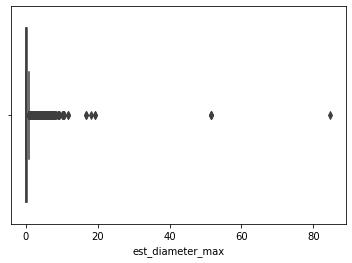

In [9]:
sns.boxplot(aster['est_diameter_max'])

In [14]:
aster['est_diameter_max'].sort_values()

24949     0.001362
45661     0.001528
88408     0.001528
51038     0.001528
75986     0.001528
           ...    
72472    19.321462
56533    51.527608
37651    51.527608
12709    51.527608
36418    84.730541
Name: est_diameter_max, Length: 90836, dtype: float64

/Users/davidpitoun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relative_velocity'>

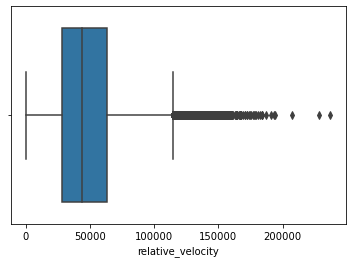

In [10]:
sns.boxplot(aster['relative_velocity'])

/Users/davidpitoun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='miss_distance'>

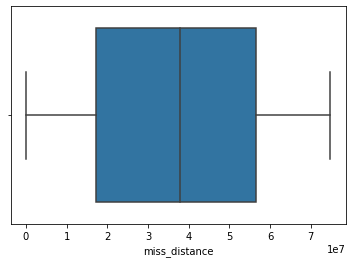

In [13]:
sns.boxplot(aster['miss_distance'])

In [3]:
ids = list(aster['id'].unique())


In [4]:
for x in ids:
    filters = aster[aster['id']==x]
    meanv = filters['relative_velocity'].mean()
    meand = filters['miss_distance'].mean()
    aster.loc[aster[aster['id']==x].index, 'relative_velocity'] = meanv
    aster.loc[aster[aster['id']==x].index, 'miss_distance'] = meand

In [5]:
aster = aster.drop_duplicates()


In [8]:
aster = aster.drop(columns=['name'], axis=1)


In [7]:
aster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27423 entries, 0 to 90823
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27423 non-null  int64  
 1   name                27423 non-null  object 
 2   est_diameter_max    27423 non-null  float64
 3   relative_velocity   27423 non-null  float64
 4   miss_distance       27423 non-null  float64
 5   absolute_magnitude  27423 non-null  float64
 6   hazardous           27423 non-null  bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 1.5+ MB


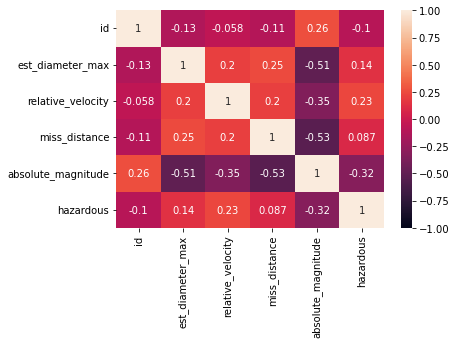

In [21]:
corr2 = aster.corr()
heatmap = sns.heatmap(corr2, vmin=-1, vmax=1, annot=True)

In [24]:
aster.isnull().values.any()

False

In [9]:
aster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27423 entries, 0 to 90823
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27423 non-null  int64  
 1   est_diameter_max    27423 non-null  float64
 2   relative_velocity   27423 non-null  float64
 3   miss_distance       27423 non-null  float64
 4   absolute_magnitude  27423 non-null  float64
 5   hazardous           27423 non-null  bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 1.3 MB


In [10]:
df = pd.get_dummies(aster, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27423 entries, 0 to 90823
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27423 non-null  int64  
 1   est_diameter_max    27423 non-null  float64
 2   relative_velocity   27423 non-null  float64
 3   miss_distance       27423 non-null  float64
 4   absolute_magnitude  27423 non-null  float64
 5   hazardous           27423 non-null  bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 1.3 MB


In [11]:
df['hazardous']=df['hazardous'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27423 entries, 0 to 90823
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27423 non-null  int64  
 1   est_diameter_max    27423 non-null  float64
 2   relative_velocity   27423 non-null  float64
 3   miss_distance       27423 non-null  float64
 4   absolute_magnitude  27423 non-null  float64
 5   hazardous           27423 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 1.5 MB


In [12]:
df = df.drop(columns=['id'], axis=1)

<AxesSubplot:ylabel='Frequency'>

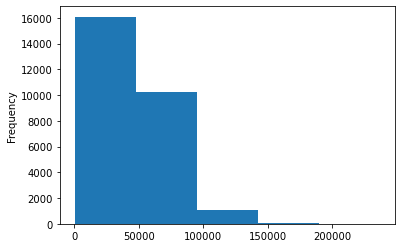

In [55]:
#in the future, would be good to prep the data with log, distrib, etc....
df['relative_velocity'].plot(kind='hist', bins=5)

In [30]:
#splitting data

from sklearn.model_selection import train_test_split

X = df.drop(['hazardous'],axis=1)
y = df['hazardous']

x_train, x_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, stratify=y)


In [14]:
#feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE


In [16]:
rfe_selector = RFE(estimator=RandomForestClassifier())
m=rfe_selector.fit(X, y)

X.columns[m.get_support()]
print("Num Features: %s" % (m.n_features_))
print("Selected Features: %s" % (m.support_))
print("Feature Ranking: %s" % (m.ranking_))

X.loc[:, m.support_].columns

Num Features: 2
Selected Features: [ True False  True False]
Feature Ranking: [1 2 1 3]


Index(['est_diameter_max', 'miss_distance'], dtype='object')

In [44]:
df.columns

Index(['est_diameter_max', 'relative_velocity', 'miss_distance',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [ ]:
# RFE selected the two following models

In [114]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.metrics import roc_auc_score


In [87]:
#https://machinelearningmastery.com/gaussian-processes-for-classification-with-python/#:~:text=The%20Gaussian%20Processes%20Classifier%20is,algorithms%20for%20classification%20and%20regression.
# initializing first model = gaussian

model = GaussianProcessClassifier()#n_jobs=-1)#optimizer='fmin_l_bfgs_b',n_jobs=-1)


In [88]:
model.fit(x_train, y_train)

GaussianProcessClassifier()

In [89]:
model.score(x_train, y_train)

1.0

In [90]:
## making prediction of the basic gaussian model on the x test-ytest
# make a prediction
pred1gauss = model.predict(x_test)
# summarize prediction
model.score(x_test, y_test)

0.9236659778777198

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7575
           1       1.00      0.04      0.07       652

    accuracy                           0.92      8227
   macro avg       0.96      0.52      0.52      8227
weighted avg       0.93      0.92      0.89      8227



<AxesSubplot:>

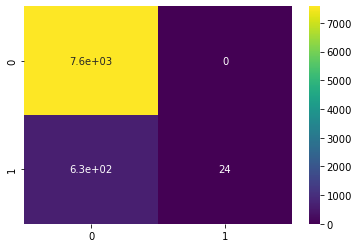

In [91]:
from sklearn.metrics import classification_report
y_pred= pred1gauss

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')

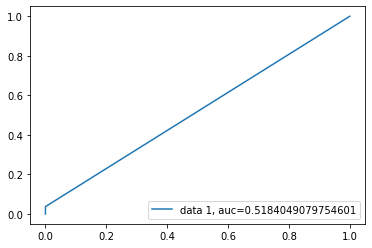

In [142]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [92]:
#### hyperparameters
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel

# define grid
grid = dict()
grid['kernel'] = [1*RBF(), 1*DotProduct(), 1*Matern(), 1*RationalQuadratic(), 1*WhiteKernel()]

In [93]:
# define search
search = GridSearchCV(model, grid, scoring='accuracy', n_jobs=-1)

In [94]:
# perform the search
results = search.fit(x_train, y_train)


KeyboardInterrupt



In [ ]:
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

In [16]:
aster['hazardous'].value_counts()

False    25250
True      2173
Name: hazardous, dtype: int64

In [ ]:
##### Bagging classifier model
'''
class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, *, 
max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, 
oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)'''

In [18]:
from sklearn.ensemble import BaggingClassifier

In [19]:
model_bagging_class = BaggingClassifier(n_estimators=10, random_state=0, n_jobs=-1, verbose=3)

In [20]:
model_bagging_class.fit(x_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    5.6s finished


BaggingClassifier(n_jobs=-1, random_state=0, verbose=3)

In [22]:
model_bagging_class.score(x_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished


0.9931756615961659

In [28]:
from sklearn.metrics import classification_report

# make a prediction
pred2bagging = model_bagging_class.predict(x_test)
# summarize prediction
model_bagging_class.score(x_test, y_test)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


0.9168591224018475

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7575
           1       0.46      0.27      0.34       652

    accuracy                           0.92      8227
   macro avg       0.70      0.62      0.65      8227
weighted avg       0.90      0.92      0.91      8227



<AxesSubplot:>

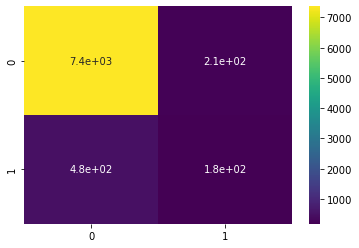

In [82]:
print(classification_report(y_test, pred2bagging))
cm = confusion_matrix(y_test,pred2bagging)
sns.heatmap(cm,annot=True,cmap='viridis')

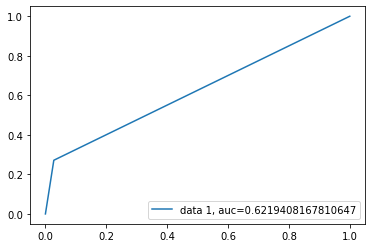

In [141]:
fpr, tpr, _ = metrics.roc_curve(y_test, pred2bagging)
auc = metrics.roc_auc_score(y_test, pred2bagging)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [118]:
#testing again with default parameters
# define the model
model_bagging_default = BaggingClassifier()
# fit the model on the whole dataset
model_bagging_default.fit(x_train, y_train)
pred_moddefBag = model_bagging_default.predict(x_test)
print(roc_auc_score(y_test, pred_moddefBag))
print(classification_report(y_test,pred_moddefBag))

0.614840956488287
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7575
           1       0.44      0.26      0.33       652

    accuracy                           0.92      8227
   macro avg       0.69      0.61      0.64      8227
weighted avg       0.90      0.92      0.90      8227



In [67]:
yhat = model_bagging_default.predict(x_test)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [62]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7575
           1       0.49      0.28      0.35       652

    accuracy                           0.92      8227
   macro avg       0.72      0.63      0.66      8227
weighted avg       0.90      0.92      0.91      8227



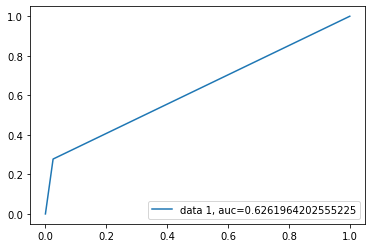

In [140]:
fpr, tpr, _ = metrics.roc_curve(y_test,  yhat)
auc = metrics.roc_auc_score(y_test, yhat)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

>10 0.919 (0.004)
>50 0.920 (0.004)
>100 0.920 (0.004)
>500 0.920 (0.004)


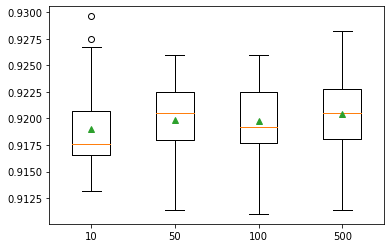

In [44]:
##Bagging HyperParameters

# explore bagging ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
    models = dict()
# define number of trees to consider
    n_trees = [10, 50, 100, 500]    #more put the computer at risk of crashing
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models

def evaluate_model(model_bagging_default, X, y):
# define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the results
    scores = cross_val_score(model_bagging_default, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
# evaluate the model
    scores = evaluate_model(model, X, y)
# store the results
    results.append(scores)
    names.append(name)
# summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [116]:
########   Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics

qda_mod = QuadraticDiscriminantAnalysis()
qda_mod.fit(x_train, y_train)
QuadraticDiscriminantAnalysis()
qda_pred = qda_mod.predict(x_test)
print(metrics.accuracy_score(y_test, qda_pred))
print(classification_report(y_test, qda_pred))
print(roc_auc_score(y_test, qda_pred))

0.9006928406466512
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7575
           1       0.35      0.30      0.33       652

    accuracy                           0.90      8227
   macro avg       0.65      0.63      0.64      8227
weighted avg       0.89      0.90      0.90      8227

0.627880094757942


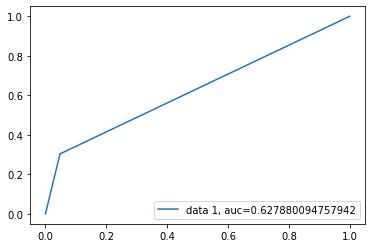

In [139]:
fpr, tpr, _ = metrics.roc_curve(y_test,  qda_pred)
auc = metrics.roc_auc_score(y_test, qda_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [80]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

<AxesSubplot:>

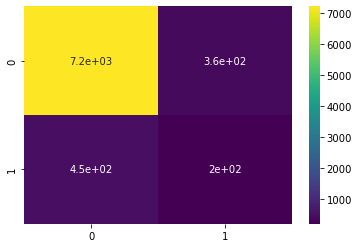

In [81]:
cm = confusion_matrix(y_test,qda_pred)
sns.heatmap(cm,annot=True,cmap='viridis')

In [ ]:
#HP ==> 'reg_param'== regularization. 



In [137]:
##### DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
DTC_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, DTC_pred))
print(roc_auc_score(y_test, DTC_pred))
print(classification_report(y_test, DTC_pred))


0.902759207487541
0.6780627265180507
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7575
           1       0.39      0.41      0.40       652

    accuracy                           0.90      8227
   macro avg       0.67      0.68      0.67      8227
weighted avg       0.90      0.90      0.90      8227



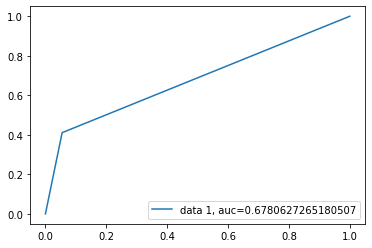

In [138]:
fpr, tpr, _ = metrics.roc_curve(y_test,  DTC_pred)
auc = metrics.roc_auc_score(y_test, DTC_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [153]:
###gridsearch HP on decision tree classifier model
#https://machinelearninghd.com/gridsearchcv-classification-hyper-parameter-tuning/
#Creating Parameters

params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'RandomState instance','random'],
}
#Fitting the model
rf = DecisionTreeClassifier()
grid = GridSearchCV(rf, params, cv=3, scoring='accuracy')
grid.fit(X, y)
metrics.roc_auc_score(y_test, DTC_pred)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'criterion': 'gini', 'splitter': 'random'}
Accuracy:0.8969478175254348


/Users/davidpitoun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/davidpitoun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/davidpitoun/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/davidpitoun/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 381, in fit
    splitter = SPLITTERS[self.sp

In [110]:
####### Model Ranking 
#https://machinelearninghd.com/gridsearchcv-classification-hyper-parameter-tuning/

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import HistGradientBoostingClassifier
    #This estimator has native support for missing values (NaNs). During training,
    #the tree grower learns at each split point whether samples with missing values 
    #should go to the left or right child, based on the potential gain. 
    #When predicting, samples with missing values are assigned to the left or right child 
    #consequently.
from sklearn.naive_bayes import MultinomialNB
    #The multinomial Naive Bayes classifier is suitable for classification with discrete features 
    #(e.g., word counts for text classification).
from sklearn.ensemble import VotingClassifier
    #Soft Voting/Majority Rule classifier for unfitted estimators.
from sklearn.linear_model import LogisticRegression

    
# group / ensemble of models

#for the voting model
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('DTC', DecisionTreeClassifier()))

# group / ensemble of models

classifiers = {
    "Decision Tree": DecisionTreeClassifier(max_depth=7), 
    "Naive Bayes"  : GaussianNB(), 
    "QDA"          : QuadraticDiscriminantAnalysis(),
    #"GaussianProcessClassifier": GaussianProcessClassifier(),
    "BaggingClassifier" : BaggingClassifier(),
    "VotingClassifier": VotingClassifier(estimators = estimator),
    "MultinomialNB" : MultinomialNB(),
    "HistGradientBoostingClassifier" : HistGradientBoostingClassifier(),
    "LogisticRegression" : LogisticRegression()
}

from time import time
nfast = 14      # Don't run the very slow ones
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    classifier.fit(x_train, y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(x_test, y_test)
    score_time = time()-start
    print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))

Decision Tree  | score = 0.923 | time = 0.073s/0.004s
Naive Bayes    | score = 0.912 | time = 0.018s/0.004s
QDA            | score = 0.901 | time = 0.006s/0.004s
BaggingClassifier| score = 0.918 | time = 0.355s/0.012s
VotingClassifier| score = 0.921 | time = 0.301s/0.077s
MultinomialNB  | score = 0.568 | time = 0.007s/0.003s
HistGradientBoostingClassifier| score = 0.923 | time = 0.481s/0.017s
LogisticRegression| score = 0.921 | time = 0.088s/0.006s


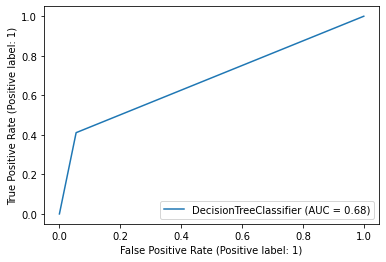

In [124]:
#####ROC curve plots
##metrics.plot_roc_curve(clf, X_test, y_test) 
metrics.plot_roc_curve(clf, x_test, y_test) 
